## Shared Bikes Case Study

#### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


## Defining the Hypothesis

Before building the model, lets define the null hypothesis test and alternate hypothesis here

**Null hypothesis**: All the `β` coefficients (i.e. β1, β2, β3..., βn) are zero, i.e. there is not relation between dependent [y] and independent [x] variable
**Alternate hypothesis**: All the `β` coefficients are not zero , i.e. there is a relation betweeb dependent and independent variables

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Importing visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing packages for Linear Regression
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step 1: Reading Data and Understanding the Data
Reading and understanding the data in the dataset

In [3]:
# reading day.csv file and storing the same in boom_bikes, as the data is for boom bikes 
boom_bikes = pd.read_csv('day.csv')
# printing the top 5 records to view the data
boom_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# printing the data to view the shape of data, to understand the size of the data
boom_bikes.shape

(730, 16)

We can see that,
- there are 730 records there in the dataset
- we have 16 columns in the dataset

In [5]:
# Now, printing the dataset info to check for any missing values as well as datatypes of the columns
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We can observe that there are no missing records in the dataset<br>
So we can proceed further.
<br><br><br>
Now, let's check whether the data in dataset is valid or not against it's definitions

### Checks for the Data

In [6]:
# Checking the sum of casual, registered and comparing with rental_bikes_count column 

# adding casual and registered column
sum_of_casual_reg = boom_bikes.casual + boom_bikes.registered

# checking sum of casual & registered is equal to rental_bikes_count column
sum(sum_of_casual_reg == boom_bikes.cnt) == boom_bikes.shape[0]

True

Based on the above output, we can say that `cnt` column is sum of `casual` and `registered` column

In [7]:
# checking the yr column value against the dteday as a check

# extracting the year from dteday column and storing in year variable
year = boom_bikes.dteday.apply(lambda x: 0 if x[-4:] == '2018' else 1)

# comparing the year data with yr column and validating the whether all the records are matching or not
sum(year == boom_bikes.yr) == boom_bikes.shape[0]

True

Based on the above output, we can confirm that `yr` and year in `dteday` column are equal

In [8]:
# checking the mnth column value against the dteday as a check

# extracting the month from dteday column and storing in month variable
month = boom_bikes.dteday.apply(lambda x: int(x[3:5]))

# comparing the month data with mnth column and validating the whether all the records are matching or not
sum(month == boom_bikes.mnth) == boom_bikes.shape[0]

True

Based on the above output, we can confirm that `mnth` and month in `dteday` column are equal
<br><br>
We can conclude that all present data is valid

In [9]:
# checking the workingday column against the weekday and holiday

# converting weekends to True i.e. when weekday equals to either 0 or 6 and rest as False
weekday_bool = boom_bikes.weekday.apply(lambda x: True if x in [0,6] else False)

# converting holiday to True i.e. when holiday equals to 1 else False
holiday_bool = boom_bikes.holiday.apply(lambda x: True if x==1 else False)

# # converting workingday  to False i.e. when workingday equals to 1 else True
workingday_bool = boom_bikes.workingday.apply((lambda x: True if x==0 else False))

# checking working is either holiday or weekend as below
sum((weekday_bool | holiday_bool) == workingday_bool) == boom_bikes.shape[0]

True

Based on the above output, we can confirm that workingday is either holiday or weekend

## Step 2: Data Preparation

- Changing the Categorical numeric values into Categorical String values
- Renaming the columns for better interpretation
- Dropping unneccessary columns

In [10]:
# for better interpretation renaming the columns
boom_bikes.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'rental_bikes_count'}, inplace = True)
# printing the top 5 rows in the dataset to check the rename of the columns are reflected on the dataset
boom_bikes.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,rental_bikes_count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


As per data-definition,
- instant
    - this is similar to indexing, so this field is not required to analysis
- dteday 
    - Date of the record, which is not very useful interms of analysis in this case
    - Month in the date might be useful, but we have a separate column for this.
- casual & registered column represetns the count of casual users and 
    - for predicting the demand, only casual user count  or registered users is insignificant
    - we need both casual and registered users, this data is available in rental_bikes_count column 
- atemp
    - this is feeling temperature, which can only be felt by the customer and this cannot be determined unless it's felt. This cannot be used for predicting the rental bikes count
    
**So, dropping these unnecessary fields**


In [11]:
# dropping the unnecessary fields
boom_bikes = boom_bikes.drop(['instant', 'dteday', 'casual', 'registered', 'atemp'], axis=1)
# printing the shape of the data to check the whether the shape
boom_bikes.shape

(730, 11)

We can see there are 11 columns available now, as we deleted 5 columns from original 16 columns

#### Updating the categorical variables with it's original values from data definition

In [12]:
#Mapping variables season, month, weathersit, weekday

boom_bikes.season=boom_bikes.season.map({1: 'Spring', 2: 'Summer',3:'Falls', 4:'Winter' })
boom_bikes.month=boom_bikes.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
boom_bikes.weathersit=boom_bikes.weathersit.map({1: 'Clear', 2:'Mist_Cloudy', 3:'Light_Snow', 4:'Heavy_Rain'})
boom_bikes.weekday=boom_bikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

boom_bikes.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,rental_bikes_count
0,Spring,0,Jan,0,Sat,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [13]:
# printing the stats for the dataset
boom_bikes.describe()

,Year,holiday,workingday,temp,humidity,windspeed,rental_bikes_count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


## Step 3: Visualising the Data

Visualising the data to see whether the data is suitable for linear regression or not as well to understand the relation between the features/columns

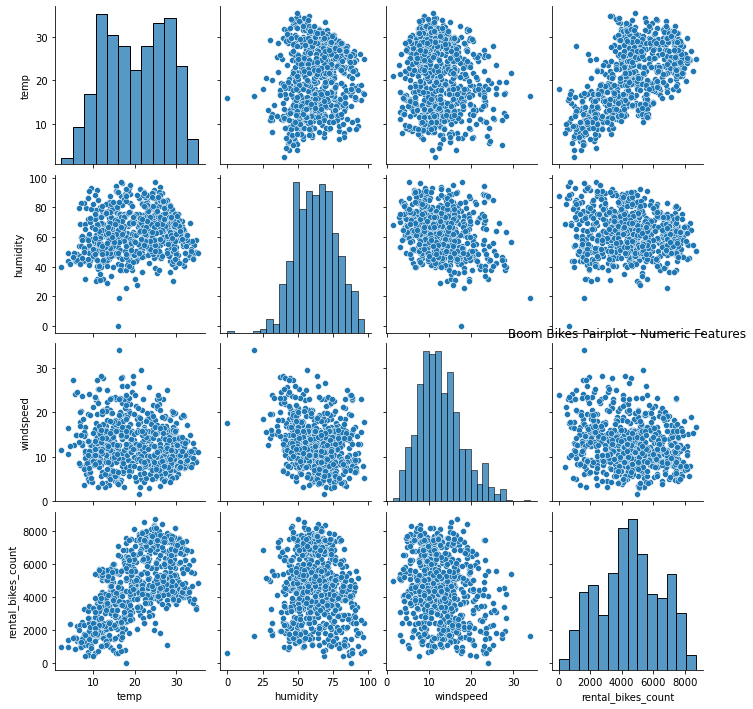

In [14]:
# ploting the pairplot for all the columns in the dataset
# ploting boom_bikes dataset using seaborn
sns.pairplot(boom_bikes[['temp','humidity', 'windspeed', 'rental_bikes_count']])
# setting the title of the pairplot
plt.title('Boom Bikes Pairplot - Numeric Features')
plt.show()

We can observe that **rental_bikes_count** is has a Linear relationship with some features
<br><br>

So, the dataset is suitable for the linear regression

### Visualising the Categorical Columns

Based on the data definition, below are the columns related to categories

- Season
- workingday
- month
- year
- holiday
- weekday
- weathersit

Now we can plot the boxplot for these categorical variable against the **rental_bikes_count** column

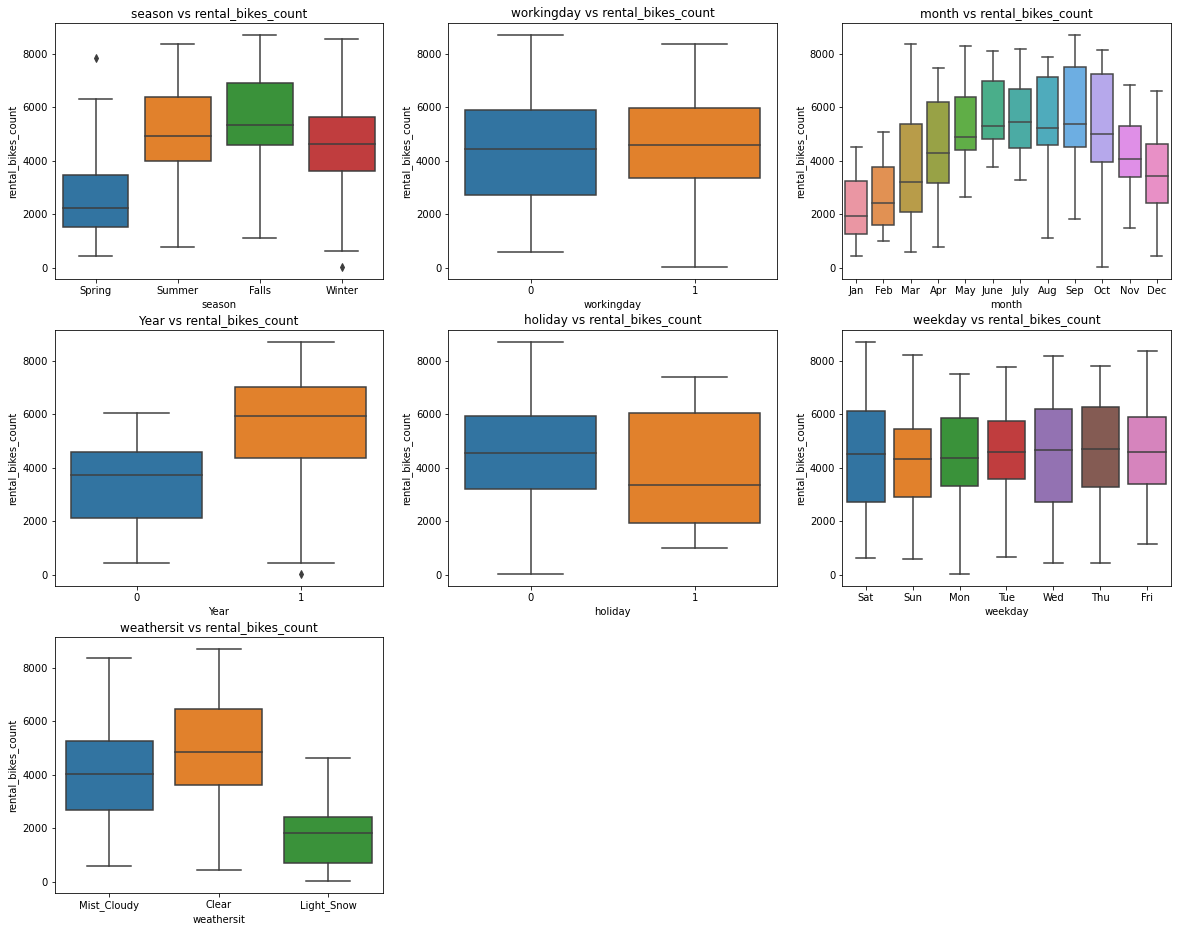

In [15]:
# Visualize Categorical variables using subplot to view the data in better picture
# using figure to explicitly control the figures
plt.figure(figsize=(20,16))

plt.subplot(3,3,1)
# season vs rental_bikes_count bloxplot 
sns.boxplot(x='season', y='rental_bikes_count', data=boom_bikes)
# setting the title of the boxplot as season vs rental_bikes_count
plt.title('season vs rental_bikes_count')

plt.subplot(3,3,2)
# workingday vs rental_bikes_count bloxplot
sns.boxplot(x='workingday', y='rental_bikes_count', data=boom_bikes)
# setting the title of the boxplot as workingday vs rental_bikes_count
plt.title('workingday vs rental_bikes_count')

plt.subplot(3,3,3)
# month vs rental_bikes_count bloxplot
sns.boxplot(x='month', y='rental_bikes_count', data=boom_bikes)
# setting the title of the boxplot as month vs rental_bikes_count
plt.title('month vs rental_bikes_count')

plt.subplot(3,3,4)
# Year vs rental_bikes_count bloxplot
sns.boxplot(x = 'Year', y = 'rental_bikes_count', data = boom_bikes)
# setting the title of the boxplot as Year vs rental_bikes_count
plt.title('Year vs rental_bikes_count')

plt.subplot(3,3,5)
# holiday vs rental_bikes_count bloxplot
sns.boxplot(x = 'holiday', y = 'rental_bikes_count', data = boom_bikes)
# setting the title of the boxplot as holiday vs rental_bikes_count
plt.title('holiday vs rental_bikes_count')

plt.subplot(3,3,6)
# weekday vs rental_bikes_count bloxplot
sns.boxplot(x = 'weekday', y = 'rental_bikes_count', data = boom_bikes)
# setting the title of the boxplot as weekday vs rental_bikes_count
plt.title('weekday vs rental_bikes_count')

plt.subplot(3,3,7)
# weathersit vs rental_bikes_count bloxplot
sns.boxplot(x = 'weathersit', y = 'rental_bikes_count', data = boom_bikes)
# setting the title of the boxplot as weathersit vs rental_bikes_count
plt.title('weathersit vs rental_bikes_count')

plt.show()

By observe the above boxplots,

- Rental bikes are taken more on Falls compare to other seasons and low on Spring season 
- For both working day and non-working day
- In mid-year [between May to October] we have high rental bikes
- There are more rental bikes on 2019 compare to 2018
- Holidays has fewer rental bikes compare to non-holiday
- For all weekdays, rental bikes have same median value
- During clear day we can see more rental bikes and there are no rental bikes taken during Heavy rain


### Dummy Variables

The variable `season`, `month`, `weekday` and `weathersit` has 4,12,7 & 4 Levels respectively. We need to convert these levels into integer as well. 

For this, let's use `dummy variables`.

In [16]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_dummy'
# and drop the first column using 'drop_first = True'
season_dummy = pd.get_dummies(boom_bikes['season'], drop_first = True)
# printing the top 5 values of the data
season_dummy.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Below are the values representing the seasons,
- `100` will represents `Spring`
- `010` will represents `Summer`
- `001` will represents `Winter`
- `000` will represents `Falls`

In [17]:
# Get the dummy variables for the feature 'month' and store it in a new variable - 'month_dummy'
# and drop the first column using 'drop_first = True'
month_dummy = pd.get_dummies(boom_bikes['month'], drop_first = True)
# printing the top 5 values of the data
month_dummy.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


Below are the values representing the Months,
- `00000000000` will represents `Apr`
- `10000000000` will represents `Aug`
- `01000000000` will represents `Des`
- `00100000000` will represents `Feb`
- `00010000000` will represents `Jan`
- `00001000000` will represents `July`
- `00000100000` will represents `June`
- `00000010000` will represents `Mar`
- `00000001000` will represents `May`
- `00000000100` will represents `Nov`
- `00000000010` will represents `Oct`
- `00000000001` will represents `Sep`

In [18]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_dummy'
# and drop the first column using 'drop_first = True'
weekday_dummy = pd.get_dummies(boom_bikes['weekday'], drop_first = True)
# printing the top 5 values of the data
weekday_dummy.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


Below are the values representing the weekday,
- `000000` will represents `Fri`
- `100000` will represents `Mon`
- `010000` will represents `Sat`
- `001000` will represents `Sun`
- `000100` will represents `Thu`
- `000010` will represents `Tue`
- `000001` will represents `Web`

In [19]:
# Get the dummy variables for the feature 'mweathersitonth' and store it in a new variable - 'weathersit_dummy'
# and drop the first column using 'drop_first = True'
weathersit_dummy = pd.get_dummies(boom_bikes['weathersit'], drop_first = True)
# printing the top 5 values of the data
weathersit_dummy.head()

,Light_Snow,Mist_Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


Here we have only two columns, it's understandable as the forth weather situation data is not present in the dataset


Below are the values representing the Weathersit,
- `00` will represents `Clear`
- `10` will represents `Light_Snow`
- `01` will represents `Mist_Cloudy`

In [20]:
# Add the dummy variables to the original dataset

boom_bikes = pd.concat([boom_bikes, season_dummy, month_dummy, weekday_dummy, weathersit_dummy], axis = 1)

In [21]:
# Now let's see the head of our dataframe.
boom_bikes.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist_Cloudy
0,Spring,0,Jan,0,Sat,0,Mist_Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,Spring,0,Jan,0,Sun,0,Mist_Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# Now we can drop the original categorical variable as we have it's dummy variable are present in the dataset
boom_bikes.drop(['season', 'month', 'weekday', 'weathersit'], axis=1, inplace = True)

In [23]:
# checking the top 5 rows post dropping the columns
boom_bikes.head()

,Year,holiday,workingday,temp,humidity,windspeed,rental_bikes_count,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist_Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


**Now our data is ready for model building**

## Step 4: Splitting the Data into Training and Testing Sets
As we know, the first step for regression is performing a train-test split
<br><br>
For Training and testing, lets take 70-30 split of data

In [24]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
# splitting the training and testing data set as 70-30 split using train_test_split
df_train, df_test = train_test_split(boom_bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
# printing both training and testing dataset shape
print(f"training dataset shape: {df_train.shape}")
print(f"test dataset shape: {df_test.shape}")

training dataset shape: (510, 29)
test dataset shape: (219, 29)


In [26]:
# printing the stats of the training dataset
df_train.describe()

,Year,holiday,workingday,temp,humidity,windspeed,rental_bikes_count,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,7.431169,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Rescaling the Features
Based on the above status we can observe that all the columns data is not spread across the same range
<br>
To keep all the feature in same range for better interpretation, using Min-Max Scaler (normalization)

In [27]:
# creating MinMaxScaler object
scaler = MinMaxScaler()

In [28]:
# Apply scaler() to temp, humidity, windspeed, rental_bikes_count columns
num_vars = ['temp', 'humidity', 'windspeed', 'rental_bikes_count']

# normalizing the training the data by performing fit and transform of the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [29]:
# printing the stats of the training data post scaling
df_train.describe()

,Year,holiday,workingday,temp,humidity,windspeed,rental_bikes_count,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now we can see that, all the features max value is 1 and min is 0
<br>
All the values are spread between 0 to 1

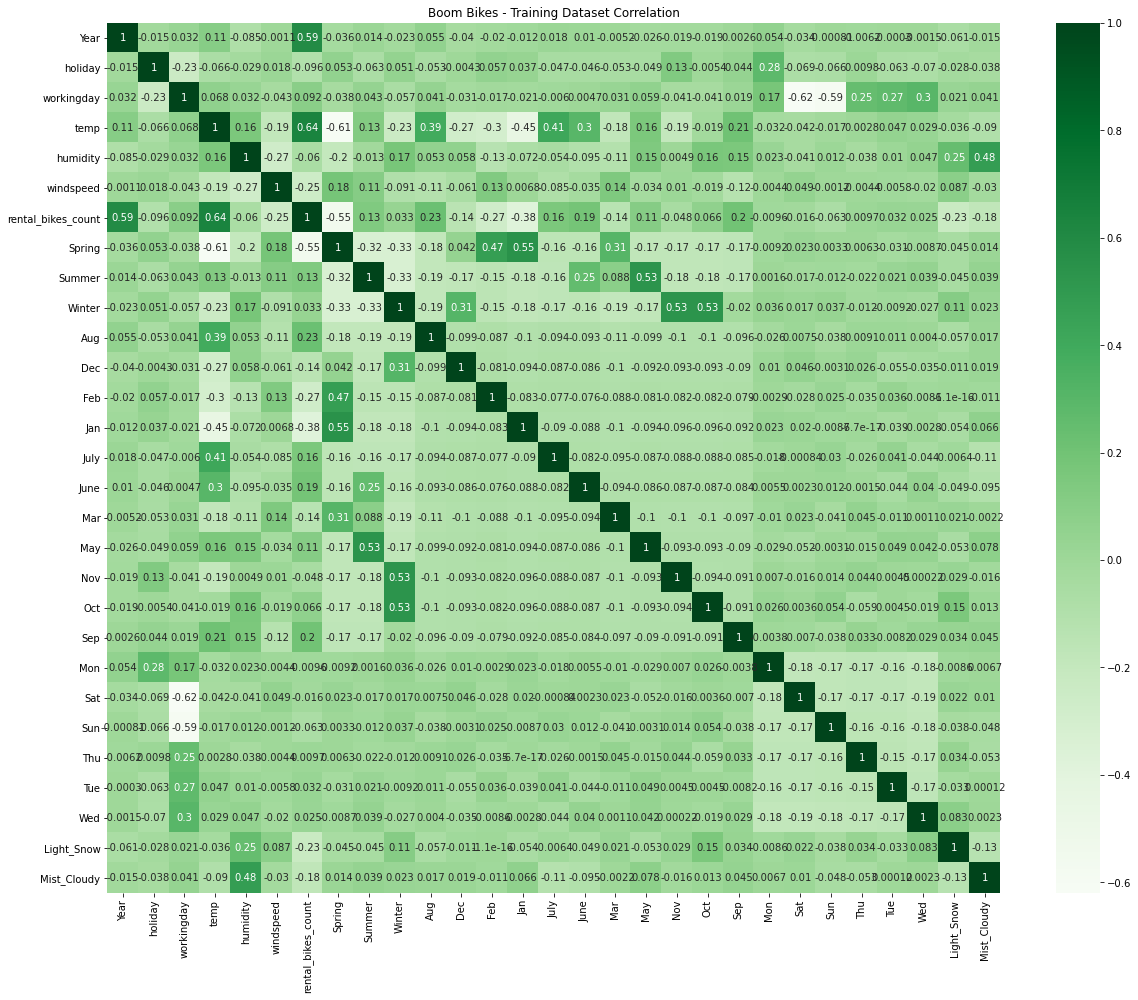

In [30]:
# Let's check the correlation coefficients to see which variables are highly correlated

# explicitly controlling the heatmap figure size
plt.figure(figsize = (20, 16))
# plotting the heatmap for training set correlation using greens
sns.heatmap(df_train.corr(), annot = True, cmap="Greens")
# setting the title of the figure for identification
plt.title('Boom Bikes - Training Dataset Correlation')
# displays the heatmap
plt.show()

As we can see on above heatmap, `temp` is having high correlation with `rental_bikes_count`

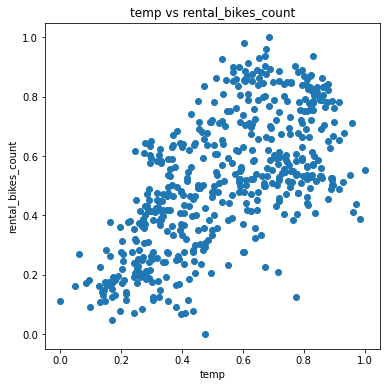

In [31]:
# We already did a scatter plot for all the columns in the dataset
# Lets plot a scatter plot for temp vs rental_bikes_count of training dataset

# explicitly controlling the image size
plt.figure(figsize=[6,6])
# plotting a scatter plot for temp vs rental_bikes_count of training dataset
plt.scatter(df_train.temp, df_train.rental_bikes_count)
# setting the title of the scatter plot
plt.title('temp vs rental_bikes_count')
# setting the x-axis label
plt.xlabel('temp')
# setting the y-axis label
plt.ylabel('rental_bikes_count')
# displays the scatterplot
plt.show()

We can observe that there is a linear relation between temp and rental_bikes_count
<br><br>
Let's pick temp as first feature to the model

### Dividing into X and Y sets for the model building

In [32]:
# dividing the training dataset into X_train and y_train, where X_train is independent features and y_train is dependent i.e. rental_bikes_count here

# storing rental_bikes_count training data in y_train
y_train = df_train.pop('rental_bikes_count')
# rest of the data is storing in X_train
X_train = df_train

## Step 5: Building a linear model

For building the model using the RFE approach to select the features

In [33]:
# We have total of 29 columns in the dataset, let's assume as take top 15 columns
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [34]:
# Printing the RFE results
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 6),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 12),
 ('Light_Snow', True, 1),
 ('Mist_Cloudy', True, 1)]

Let's take top columns (i.e. 

In [35]:
# Taking the RFE supported columns/features and storing in col variable
col = X_train.columns[rfe.support_]
# printing the columns choosen by RFE
col

Index(['Year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'Spring', 'Summer', 'Winter', 'Jan', 'July', 'Sep', 'Sat', 'Light_Snow',
       'Mist_Cloudy'],
      dtype='object')

In [36]:
# Printing the columns left by RFE for reference
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

In [37]:
# Creating X_test dataframe with RFE selected variables
X_train_lm = X_train[col]

In [38]:
# Adding constant to the training data
X_train_rfe = sm.add_constant(X_train_lm)

In [39]:
# Running the linear model with above data
lm_1 = sm.OLS(y_train,X_train_rfe).fit()

In [40]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:     rental_bikes_count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.31e-191
Time:                        16:43:49   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2510      0.036      6.949      

Below are the observeration of the model
- Model explains approximately **85%** change in the `rental_bike_count`
- P value of all features are less tha **5%**

Now, let's look into the VIF values of all features to determine the model

In [41]:
# creating a reusable method to use multiple times
def get_vif(X):
#     Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
#     taking the features from the dataset
    vif['Features'] = X.columns
#     getting the VIF value for each feature
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     rounding the VIF value to 2 decimal points
    vif['VIF'] = round(vif['VIF'], 2)
#     sorting the VIF data
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

get_vif(X_train_lm)

,Features,VIF
4,humidity,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,Spring,4.53
8,Winter,3.48
7,Summer,2.84
14,Mist_Cloudy,2.29
0,Year,2.09
12,Sat,1.98


`humidity` has very high VIF value <br>
So, let's drop the `humidity` from the model

In [42]:
# dropping the bumidity from the X_train_lm
X_train_lm.drop('humidity', axis=1, inplace=True)

Now, we build the model again without humidity feature and see the model

In [43]:
# Adding constant to the training data
X_train_rfe = sm.add_constant(X_train_lm)

# Running the linear model with above data
lm_2 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:     rental_bikes_count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.33e-189
Time:                        16:43:49   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1737      0.031      5.525      

There is no much change in R-square after dropping the `humidity` feature and the model explains **84%** of change in `rental bikes count`

In [44]:
# Now let's look inti VIF values again
get_vif(X_train_lm)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,Spring,3.08
6,Summer,2.33
0,Year,2.08
7,Winter,1.99
11,Sat,1.97
8,Jan,1.62
9,July,1.59


We can see that `temp` has VIF more than 5, let's drop the `temp` as VIF value shouldn't be more than 5 %

In [45]:
# dropping the temp from the X_train_lm
X_train_lm.drop('temp', axis=1, inplace=True)

In [46]:
# Adding constant to the training data
X_train_rfe = sm.add_constant(X_train_lm)

# Running the linear model with above data
lm_3 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:     rental_bikes_count   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.04e-154
Time:                        16:43:49   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5448      0.020     27.136      

We can see that,
- Now R-square value of the model is 0.78
- July has high P-value [0.645]

In [47]:
# Now let's look inti VIF values again
get_vif(X_train_lm)

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
4,Spring,2.97
5,Summer,2.27
6,Winter,1.99
0,Year,1.91
10,Sat,1.69
7,Jan,1.60
12,Mist_Cloudy,1.56
8,July,1.30


All the features VIF values are below 5. <br>
<br>
As P-value of `July` is very high, let's drop it

In [48]:
# dropping the July from the X_train_lm
X_train_lm.drop('July', axis=1, inplace=True)

# Adding constant to the training data
X_train_rfe = sm.add_constant(X_train_lm)

# Running the linear model with above data
lm_4 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:     rental_bikes_count   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     147.6
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.62e-155
Time:                        16:43:50   Log-Likelihood:                 425.61
No. Observations:                 510   AIC:                            -825.2
Df Residuals:                     497   BIC:                            -770.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5409      0.018     29.669      

We can see that,
- Now R-square value of the model is same as previous i.e. 0.78 (no change in value after dropping the `July` feature)
- P-value of `holiday` is more than **5%**

In [49]:
# Now let's look inti VIF values again
get_vif(X_train_lm)

,Features,VIF
3,windspeed,4.12
2,workingday,3.54
4,Spring,2.68
5,Summer,2.00
0,Year,1.89
6,Winter,1.78
9,Sat,1.62
7,Jan,1.60
11,Mist_Cloudy,1.56
8,Sep,1.20


All the features VIF values are below 5. <br>
<br>
As P-value of `holiday` is more than5, let's drop it and build the model again

In [50]:
# dropping the holiday from the X_train_lm
X_train_lm.drop('holiday', axis=1, inplace=True)

# Adding constant to the training data
X_train_rfe = sm.add_constant(X_train_lm)

# Running the linear model with above data
lm_4 = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     rental_bikes_count   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.30e-155
Time:                        16:43:50   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5334      0.018     30.033      0.000       0.499       0.568
Year            0.2480      0.009     26.149      0.000       0.229       0.267
workingday      0.0567      0.013      4.377      0.000       0.031       0.082
windspeed      -0.1887      0.029     -6.453      0.000      -0.246      -0.131
Spring         -0.2581      0.016    -15.860      0.000      -0.290      -0.226
Summer         -0.0406      0.014     -2.847      0.005      -0.069      -0.013
Winter         -0.0729      0.014     -5.303      0.000      -0.100      -0.046
Jan            -0.1031      0.020     -5.130      0.000      -0.143      -0.064
Sep             0.0714      0.019      3.810      0.000       0.035       0.108
Sat             0.0650      0.017      3.900      0.000       0.032       0.098
Light_Snow     -0.3034      0.029    -10.586      0.000      -0.360      -0.247
Mist_Cloudy    -0.0888      0.010     -8.757      0.000      -0.109      -0.069
==============================================================================
Omnibus:                       39.474   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.218
Skew:                          -0.458   Prob(JB):                     3.81e-18
Kurtosis:                       4.714   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is a slight decrease in the R-square value of the model, and P-values of all features are less than 5% (i.e. 0.05) 

In [51]:
# Now let's look inti VIF values again
get_vif(X_train_lm)

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
3,Spring,2.65
4,Summer,1.99
0,Year,1.88
5,Winter,1.73
6,Jan,1.60
8,Sat,1.56
10,Mist_Cloudy,1.56
7,Sep,1.18


VIF value of all features are below 5<br><br>

Our Final Linear Regression model is able to explain **78%** of change on Rental Bikes counts

**Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.**

### Hypothesis Results

Based on our final model we can see `p` values of all features is less than **0.05**, so we **we can reject the null hypothesis** (i.e.) All the β coefficients are not zero

## Step 6: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [52]:
# Predicting the rental_bikes_count from the final linear regression model
y_train_pred = lm_4.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

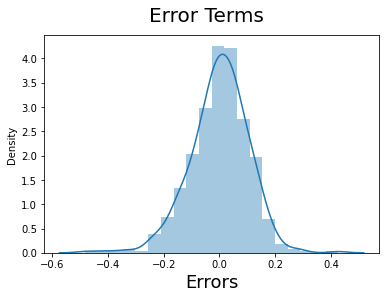

In [53]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)
# X-label
plt.xlabel('Errors', fontsize = 18)

We can see that **Error Term** is approximately looks like Normal distribution and it's mean is `0`

### Checking Homoscedasticity
Ploting the scatter plot between y_train_pred & residuals and see if there any pattern in the distribution

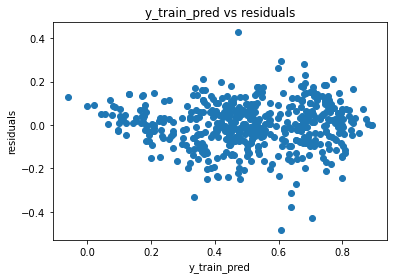

In [54]:
# Plotting scatter plot between y_train_pred and residuals
plt.figure()
plt.scatter(y_train_pred, y_train-y_train_pred)
# x-label
plt.xlabel('y_train_pred')
# y-label
plt.ylabel('residuals')
# title of the plot
plt.title('y_train_pred vs residuals')
plt.show()

There is no pattern available in the above distribution, so our model is `Homoscedasticity`

## Step 7: Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [55]:
# As we scaled the Training dataset, we need to do the same for testing data set as well
# normalizing the training the data by performing transform of the data
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [56]:
# printing the stats of the testing dataset
df_test.describe()

,Year,holiday,workingday,temp,humidity,windspeed,rental_bikes_count,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist_Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [57]:
# storing the rental_bikes_count in y_test
y_test = df_test.pop('rental_bikes_count')
# storing the rest of the features in the X_test
X_test = df_test

In [58]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_lm = X_test[X_train_lm.columns]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_lm)

In [59]:
# Making predictions
y_pred = lm_4.predict(X_test_lm)

## Model Evaluation

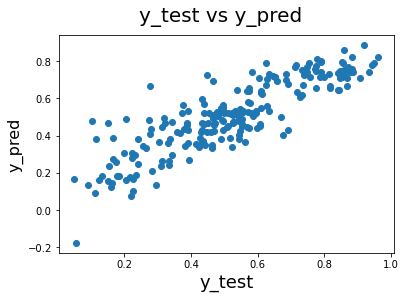

In [60]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
# Plot heading 
fig.suptitle('y_test vs y_pred', fontsize = 20)  
# X-label
plt.xlabel('y_test', fontsize = 18)   
# Y-label
plt.ylabel('y_pred', fontsize = 16)      
plt.show()

We can observe above scatter plot and ses a linear relation between y_test and y_pred

We can see that the equation of our best fitted line is:

$ rental-bikes-count = 0.25  \times  Year + 0.07  \times  Sep + 0.06 \times Sat + 0.06 \times workingday - 0.30 \times Light_Snow - 0.26 \times Spring - 0.19 \times windspeed - 0.10 \times Jan - 0.09 \times Mist_Cloudy - 0.072 \times Winter - 0.04 \times Summer  $ 

In [61]:
# Evaluating the model using R-square value
# r-square value
r2_score(y_test, y_pred)

0.7409269375982522

We can see that model shows R-square as **78** and R-square of y_test& y_pred is **74** which is in acceptable range (variance of 5).


# Conclusion

1. Our model is able to explained `74 %` demand of rental bikes count in test set (where model is originally said to explain `78%` of the demand)
2. Below are the feature which explains the demand on shared bikes
    - Year
    - Sep [September]
    - Sat [Saturday]
    - workingday
    - Light Snow
    - Spring
    - windspeed
    - Jan
    - Mist + Cloudy
    - Winter
    - Summer